<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/Keras/CNN_%EC%95%8C%ED%8C%8C%EB%B2%B3_Classification(%EC%83%9D%ED%99%9C%EC%BD%94%EB%94%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [ ]:
# 이미지 읽어서 데이터 준비하기
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png') # 파일 경로를 전부 불러들임
paths = np.random.permutation(paths) # 파일들을 섞어줌
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))]) # 파일 경로에 가서 읽음
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))])
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [ ]:
종속[0:10]

array(['C', 'E', 'I', 'C', 'F', 'B', 'B', 'D', 'A', 'J'], dtype='<U1')

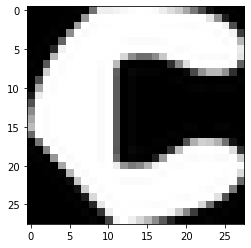

In [ ]:
plt.imshow(독립[0], cmap='gray')

In [ ]:
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [ ]:
import tensorflow as tf 

# 모델을 완성합니다. 
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 14s 22ms/step - loss: 0.5054 - accuracy: 0.8562
Epoch 2/10
586/586 [==============================] - 13s 22ms/step - loss: 0.2642 - accuracy: 0.9233
Epoch 3/10
586/586 [==============================] - 13s 23ms/step - loss: 0.2083 - accuracy: 0.9366
Epoch 4/10
586/586 [==============================] - 13s 22ms/step - loss: 0.1723 - accuracy: 0.9476
Epoch 5/10
586/586 [==============================] - 13s 23ms/step - loss: 0.1446 - accuracy: 0.9551
Epoch 6/10
586/586 [==============================] - 13s 23ms/step - loss: 0.1226 - accuracy: 0.9609
Epoch 7/10
586/586 [==============================] - 13s 23ms/step - loss: 0.1040 - accuracy: 0.9668
Epoch 8/10
586/586 [==============================] - 13s 22ms/step - loss: 0.0886 - accuracy: 0.9700
Epoch 9/10
586/586 [==============================] - 13s 23ms/step - loss: 0.0724 - accuracy: 0.9773
Epoch 10/10
586/586 [==============================] - 13s 23ms/step - loss: 0.060